<a href="https://colab.research.google.com/github/Luscaswolf/Iris_DataSet/blob/main/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/iris.csv')

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
df.isna().any()

sepal.length    False
sepal.width     False
petal.length    False
petal.width     False
variety         False
dtype: bool

In [ ]:
iris = df['variety']
iris = iris.drop(columns=0)
iris.name = "species"
df = pd.concat([df, iris], axis=1)
df = df.drop(columns='variety')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


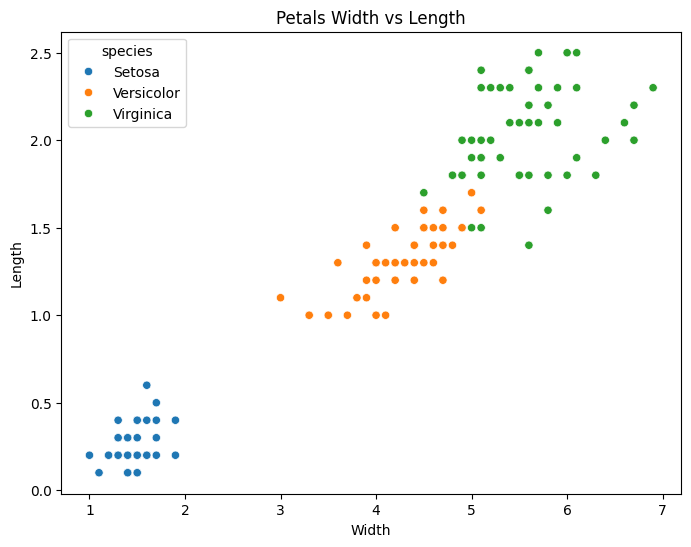

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'petal.length', y = 'petal.width', hue = 'species')
plt.title('Petals Width vs Length')
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

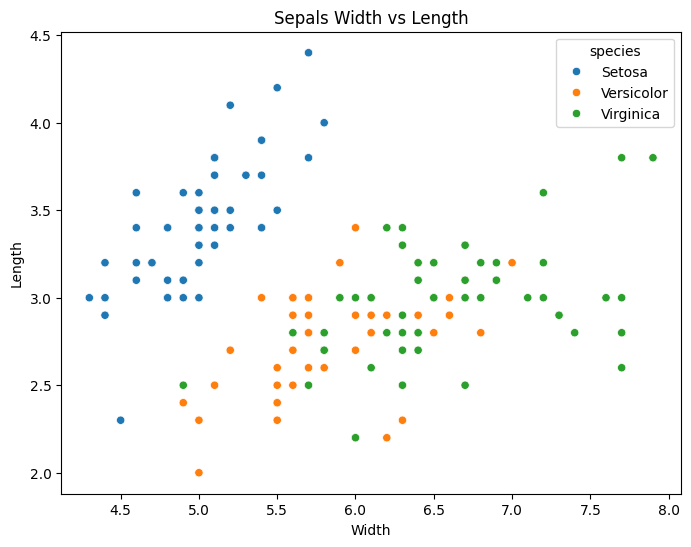

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'sepal.length', y = 'sepal.width', hue = 'species')
plt.title('Sepals Width vs Length')
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

In [ ]:
min_max_values = df.groupby('species').agg({'sepal.length': 'min', 'sepal.width': 'min', 'petal.length': 'min', 'petal.width': 'min',
                                              'sepal.length': 'max', 'sepal.width': 'max', 'petal.length': 'max', 'petal.width': 'max'})

print(min_max_values)

            sepal.length  sepal.width  petal.length  petal.width
species                                                         
Setosa               5.8          4.4           1.9          0.6
Versicolor           7.0          3.4           5.1          1.8
Virginica            7.9          3.8           6.9          2.5


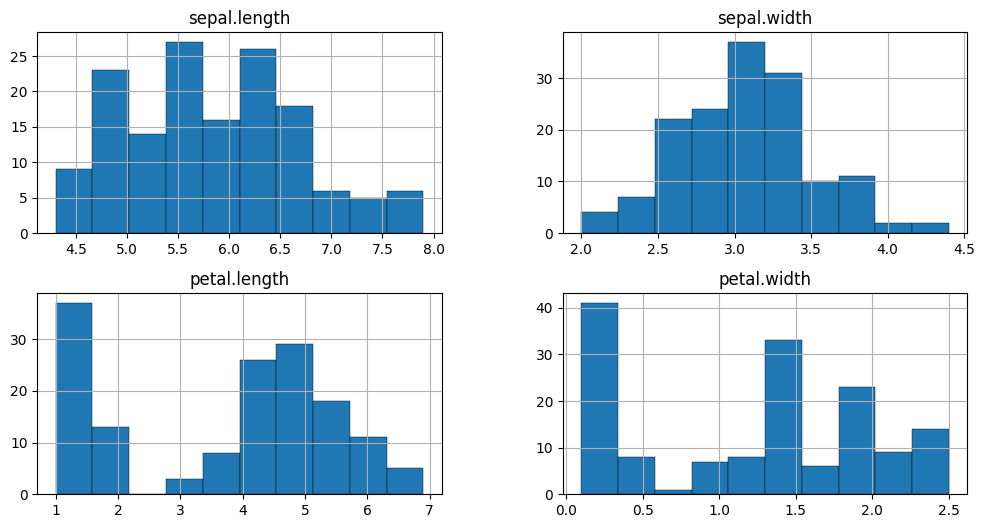

In [ ]:
df.hist(figsize=(12,6), edgecolor = 'black', linewidth=0.3)
plt.show()

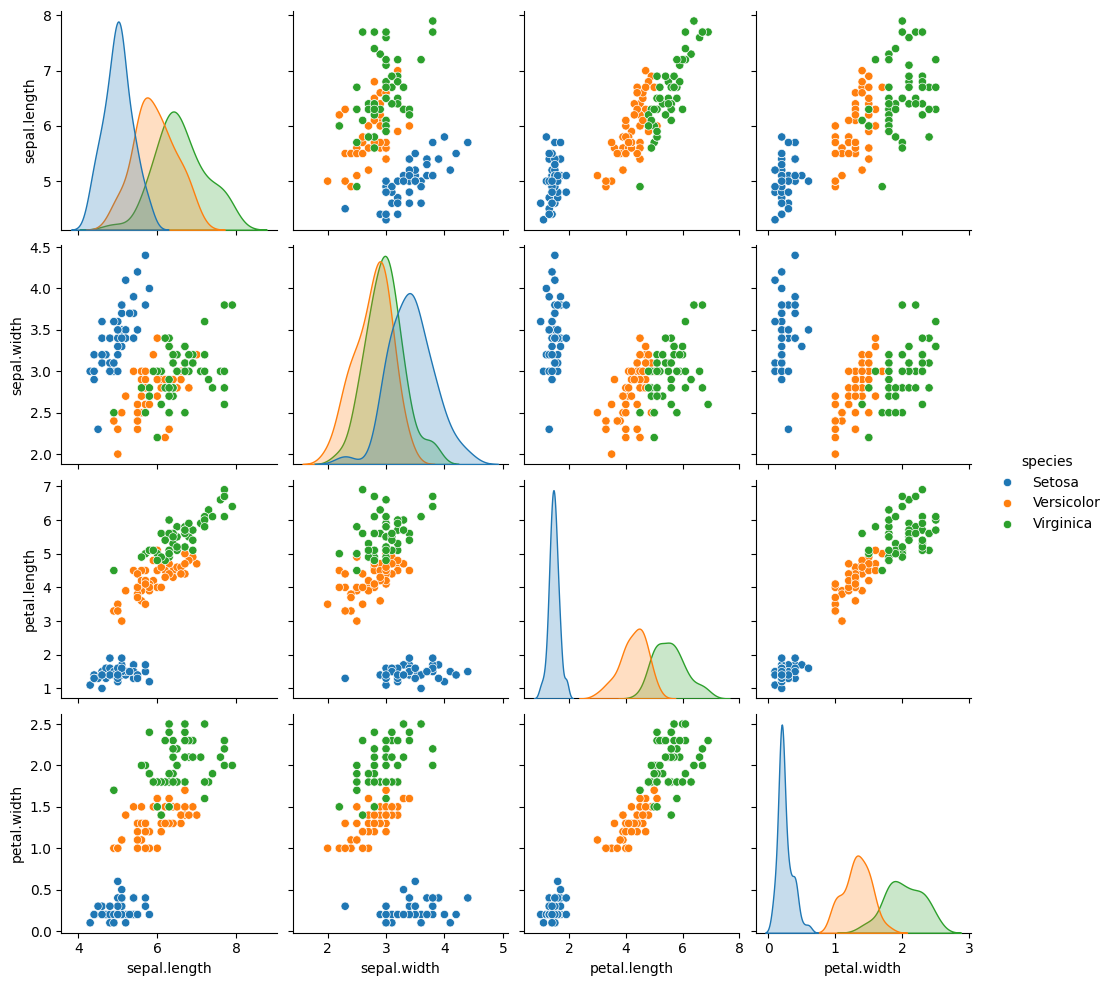

In [ ]:
sns.pairplot(df, hue = 'species')

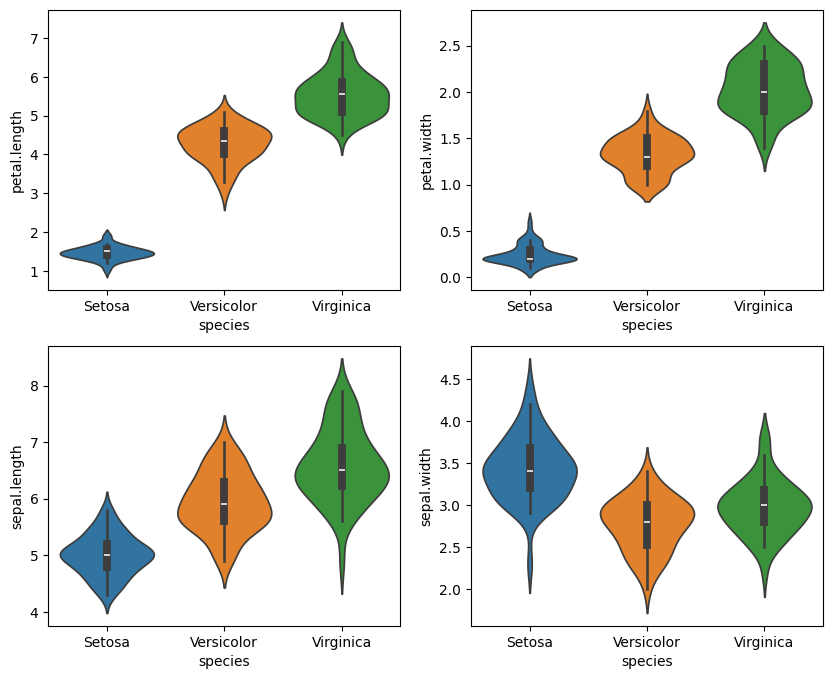

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.violinplot(x='species', y='petal.length', hue = 'species', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='petal.width', hue = 'species', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='sepal.length', hue = 'species', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='sepal.width', hue = 'species', data=df)
plt.show()


In [ ]:
# divisao treino-teste

from sklearn.model_selection import train_test_split

# modelos para testar

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

# metricas de performace e comparação

from sklearn import metrics

In [ ]:
transform = {'Setosa':0, 'Versicolor': 1, 'Virginica': 2}
df['species_num'] = df['species'].map(transform)
df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,species,species_num
36,5.5,3.5,1.3,0.2,Setosa,0
120,6.9,3.2,5.7,2.3,Virginica,2
115,6.4,3.2,5.3,2.3,Virginica,2
133,6.3,2.8,5.1,1.5,Virginica,2
23,5.1,3.3,1.7,0.5,Setosa,0


In [ ]:
df['species'] = df['species_num']
df = df.drop(columns=['species_num'])
df

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
predicatiors = df.iloc[:,:-1]
target = df['species']

print('PREDICATORS')
print('-----------')
print(predicatiors.iloc[[10,40,60,80,100,101]])
print('------------------------------------------------------------')
print('TARGET')
print('------')
print(target.iloc[[10,40,60,80,100,101]])

PREDICATORS
-----------
     sepal.length  sepal.width  petal.length  petal.width
10            5.4          3.7           1.5          0.2
40            5.0          3.5           1.3          0.3
60            5.0          2.0           3.5          1.0
80            5.5          2.4           3.8          1.1
100           6.3          3.3           6.0          2.5
101           5.8          2.7           5.1          1.9
------------------------------------------------------------
TARGET
------
10     0
40     0
60     1
80     1
100    2
101    2
Name: species, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predicatiors, target, test_size=0.3)

print("Training Data - 70%: ", X_train.shape, y_train.shape)
print("Training Data - 30% ", X_test.shape, y_test.shape)

Training Data - 70%:  (105, 4) (105,)
Training Data - 30%  (45, 4) (45,)


Modelo SVM | Suport Vector Machine

In [ ]:
svm_model= svm.SVC(kernel= 'linear', C=1)
svm_fit = svm_model.fit(X_train, y_train)
svm_prediction = svm_fit.predict(X_test)

svm_metric = metrics.accuracy_score(svm_prediction, y_test)
print("Accuracy", svm_metric)

Accuracy 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, svm_prediction, labels=[0, 1, 2])
confusion_df = pd.DataFrame(confusion, columns=['setosa_predicted', 'versicolor_predicted', 'virginica_predicted'],
                             index=['setosa_original', 'versicolor_original', 'virginica_original'])
confusion_df

,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,13,0,0
versicolor_original,0,16,0
virginica_original,0,0,16


In [ ]:
metrics.confusion_matrix(y_test,svm_prediction, labels=[0,1,2])

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 16]])

Regressão Logística


In [ ]:
lr_model = LogisticRegression()
lt_fit = lr_model.fit(X_train, y_train)
lt_predicition = lt_fit.predict(X_test)

lt_metric = metrics.accuracy_score(lt_predicition, y_test)

print("Accuracy", lt_metric)

Accuracy 0.9555555555555556


In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_test,lt_predicition,labels=[0,1,2]),
            columns=['setosa_predicted', 'versicolor_predicted', 'virginica_predicted'],
             index=['setosa_original', 'versicolor_original', 'virginica_original'])


,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,19,0,0
versicolor_original,0,14,0
virginica_original,0,0,12


In [ ]:
from sklearn.metrics import confusion_matrix
metrics = {'accuracy': 0.85, 'precision': 0.78, 'recall': 0.92}
lt_prediction = [0, 1, 2, 0, 1]
y_test = [0, 1, 2, 1, 1]
cm = confusion_matrix(y_test, lt_prediction, labels=[0, 1, 2])
df_confusion = pd.DataFrame(cm,
                            columns=['setosa_predicted', 'versicolor_predicted', 'virginica_predicted'],
                            index=['setosa_original', 'versicolor_original', 'virginica_original'])
for metric, value in metrics.items():
    df_confusion[metric] = value
print(df_confusion)

                     setosa_predicted  versicolor_predicted  \
setosa_original                     1                     0   
versicolor_original                 1                     2   
virginica_original                  0                     0   

                     virginica_predicted  accuracy  precision  recall  
setosa_original                        0      0.85       0.78    0.92  
versicolor_original                    0      0.85       0.78    0.92  
virginica_original                     1      0.85       0.78    0.92  
